In [190]:

import re
import copy
import pandas as pd
operators = {
    "drag": pd.read_csv('drag.csv').dropna(),
    "tap": pd.read_csv('tap.csv').dropna(),
    "keystroke": pd.read_csv('keystroke.csv').dropna()
}
for key in operators.keys():
    operators[key]['attempt_number'] = operators[key].sort_values(['Name(Gender/Age/Level)', 'Attempted Date Time']).groupby('Name(Gender/Age/Level)').cumcount()
    operators[key] = operators[key].groupby('Name(Gender/Age/Level)', group_keys=False).apply(lambda g: g.iloc[1:-1])
# Get the mean of reduced  timings per participant
mean_operators = copy.deepcopy(operators)
for key in mean_operators.keys():
    mean_operators[key] = mean_operators[key].groupby(['Name(Gender/Age/Level)', 'Nivel de escoralidad', 'Experiencia con tecnología'], as_index=False).mean()

In [191]:
operators['drag']

,Name(Gender/Age/Level),Attempted Date Time,Apple(sec/ms),Football(sec/ms),Sun(sec/ms),Overall(sec/ms),Window(sec/ms),Asistencia,Errores,Edad,Nivel de escoralidad,Experiencia con tecnología,attempt_number
167,Agustín Pacheco Ríos (M/60/Elderly),2022-05-16 12:36:25,14.25,7.88,15.76,37.89,53.08,0.0,0.0,61.0,Primaria,Básica,4
168,Agustín Pacheco Ríos (M/60/Elderly),2022-05-16 12:23:38,17.41,16.69,9.85,43.95,53.70,0.0,0.0,61.0,Primaria,Básica,3
170,Agustín Pacheco Ríos (M/60/Elderly),2022-05-16 11:59:23,15.67,13.48,10.58,39.73,50.79,0.0,0.0,61.0,Primaria,Básica,2
174,Agustín Pacheco Ríos (M/60/Elderly),2022-05-16 11:54:15,17.43,20.64,14.80,52.87,67.01,0.0,0.0,61.0,Primaria,Básica,1
129,Dionicia(F/72/Elderly),2022-05-18 9:22:13,6.58,4.48,2.03,13.09,29.51,0.0,0.0,72.0,Primaria,Básica,3
131,Dionicia(F/72/Elderly),2022-05-18 9:21:35,0.92,2.15,2.54,5.61,13.70,0.0,1.0,72.0,Primaria,Básica,2
133,Dionicia(F/72/Elderly),2022-05-18 9:21:15,2.58,3.91,4.02,10.51,19.34,1.0,1.0,72.0,Primaria,Básica,1
198,Dora Luz Becerril Ozuna(F/61/Elderly),2022-05-15 11:09:42,0.69,1.82,2.36,4.87,9.64,0.0,0.0,61.0,Licenciatura,Elderly,3
199,Dora Luz Becerril Ozuna(F/61/Elderly),2022-05-15 11:09:05,1.03,1.95,2.07,5.05,9.98,0.0,0.0,61.0,Licenciatura,Elderly,2
200,Dora Luz Becerril Ozuna(F/61/Elderly),2022-05-15 11:08:25,1.03,2.06,1.44,4.53,8.76,0.0,0.0,61.0,Licenciatura,Elderly,1


In [192]:
mean_operators['drag']

,Name(Gender/Age/Level),Nivel de escoralidad,Experiencia con tecnología,Apple(sec/ms),Football(sec/ms),Sun(sec/ms),Overall(sec/ms),Window(sec/ms),Asistencia,Errores,Edad,attempt_number
0,Agustín Pacheco Ríos (M/60/Elderly),Primaria,Básica,16.190000,14.672500,12.747500,43.610000,56.145000,0.000000,0.000000,61.0,2.5
1,Dionicia(F/72/Elderly),Primaria,Básica,3.360000,3.513333,2.863333,9.736667,20.850000,0.333333,0.666667,72.0,2.0
2,Dora Luz Becerril Ozuna(F/61/Elderly),Licenciatura,Elderly,0.916667,1.943333,1.956667,4.816667,9.460000,0.000000,0.000000,61.0,2.0
3,Federico Guevara(M/65/Elderly),Preparatoria,Basica,1.268000,1.172000,1.540000,3.980000,8.592000,0.000000,0.000000,65.0,3.0
4,Gabriel Paramo(M/86/Level 1),UNIVERSIDAD,BASICA,0.633333,0.706667,0.966667,2.306667,4.803333,0.333333,0.000000,86.0,2.0
5,Guillermo Garcia Perez(M/75/Elderly),Primaria,Basica,0.906667,0.986667,1.126667,3.020000,7.496667,0.000000,1.000000,75.0,2.0
6,Josefina Chavez(F/61/Level 1),Licenciatura,Basica,4.396667,1.776667,2.053333,8.226667,14.713333,0.333333,0.333333,62.0,2.0
7,Luis Alejandro(M/63/Elderly),Preparatoria,Media,1.035000,1.455000,1.275000,3.765000,9.985000,0.500000,0.500000,63.0,1.5
8,Maria Jimenez(F/67/Elderly),Primaria,Intermedia,2.493333,4.093333,3.586667,10.173333,16.510000,0.000000,0.333333,68.0,2.0
9,Maria del Rosario Ramos Naranjo(F/61/Elderly),Primaria,Basica,2.510000,2.726667,2.630000,7.866667,40.946667,2.000000,1.666667,61.0,2.0


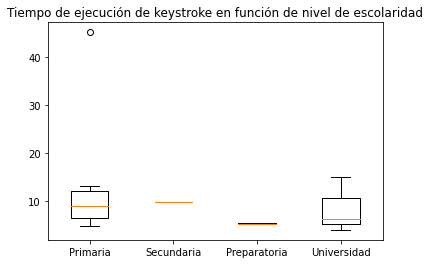

In [193]:
import matplotlib.pyplot as plt
# Tiempo de ejecución de keystroke en función de nivel de escolaridad
plt.boxplot(
    [
        mean_operators['keystroke'][mean_operators['keystroke']['Nivel de escoralidad'].isin(['Primaria'])]['Window(sec/ms)'],
        mean_operators['keystroke'][mean_operators['keystroke']['Nivel de escoralidad'].isin(['Secundaria'])]['Window(sec/ms)'],
        mean_operators['keystroke'][mean_operators['keystroke']['Nivel de escoralidad'].isin(['Preparatoria'])]['Window(sec/ms)'],
        mean_operators['keystroke'][mean_operators['keystroke']['Nivel de escoralidad'].isin(['UNIVERSIDAD', 'Licenciatura', 'Educacion Superior'])]['Window(sec/ms)']
    ]
)
plt.title('Tiempo de ejecución de keystroke en función de nivel de escolaridad')
plt.xticks([1, 2, 3, 4], ['Primaria', 'Secundaria', 'Preparatoria', 'Universidad'])
plt.show()

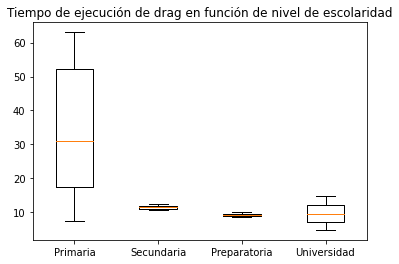

In [194]:
# Tiempo de ejecución de drag en función de nivel de escolaridad
plt.boxplot(
    [
        mean_operators['drag'][mean_operators['drag']['Nivel de escoralidad'].isin(['Primaria'])]['Window(sec/ms)'],
        mean_operators['drag'][mean_operators['drag']['Nivel de escoralidad'].isin(['Secundaria'])]['Window(sec/ms)'],
        mean_operators['drag'][mean_operators['drag']['Nivel de escoralidad'].isin(['Preparatoria'])]['Window(sec/ms)'],
        mean_operators['drag'][mean_operators['drag']['Nivel de escoralidad'].isin(['UNIVERSIDAD', 'Licenciatura', 'Educacion Superior'])]['Window(sec/ms)']
    ]
)
plt.title('Tiempo de ejecución de drag en función de nivel de escolaridad')
plt.xticks([1, 2, 3, 4], ['Primaria', 'Secundaria', 'Preparatoria', 'Universidad'])
plt.show()

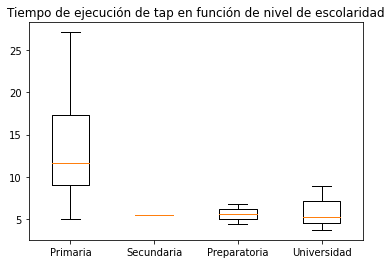

In [195]:
# Tiempo de ejecución de tap en función de nivel de escolaridad
plt.boxplot(
    [
        mean_operators['tap'][mean_operators['tap']['Nivel de escoralidad'].isin(['Primaria'])]['Window(sec/ms)'],
        mean_operators['tap'][mean_operators['tap']['Nivel de escoralidad'].isin(['Secundaria'])]['Window(sec/ms)'],
        mean_operators['tap'][mean_operators['tap']['Nivel de escoralidad'].isin(['Preparatoria'])]['Window(sec/ms)'],
        mean_operators['tap'][mean_operators['tap']['Nivel de escoralidad'].isin(['UNIVERSIDAD', 'Licenciatura', 'Educacion Superior'])]['Window(sec/ms)']
    ]
)
plt.title('Tiempo de ejecución de tap en función de nivel de escolaridad')
plt.xticks([1, 2, 3, 4], ['Primaria', 'Secundaria', 'Preparatoria', 'Universidad'])
plt.show()

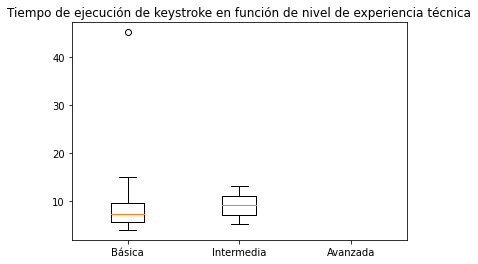

In [196]:
# Tiempo de ejecución de keystroke en función de nivel de experiencia técnica
plt.boxplot(
    [
        mean_operators['keystroke'][mean_operators['keystroke']['Experiencia con tecnología'].isin(['Basica', 'Básica', 'BASICA', 'sin experiencia', 'Elderly'])]['Window(sec/ms)'],
        mean_operators['keystroke'][mean_operators['keystroke']['Experiencia con tecnología'].isin(['Intermedia', 'Media'])]['Window(sec/ms)'],
        mean_operators['keystroke'][mean_operators['keystroke']['Experiencia con tecnología'].isin(['Avanzada'])]['Window(sec/ms)'],
    ]
)
plt.title('Tiempo de ejecución de keystroke en función de nivel de experiencia técnica')
plt.xticks([1, 2, 3], ['Básica', 'Intermedia', 'Avanzada'])
plt.show()

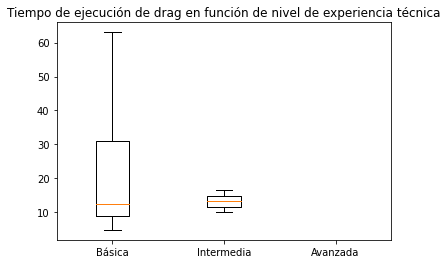

In [197]:
# Tiempo de ejecución de drag en función de nivel de experiencia técnica
plt.boxplot(
    [
        mean_operators['drag'][mean_operators['drag']['Experiencia con tecnología'].isin(['Basica', 'Básica', 'BASICA', 'sin experiencia', 'Elderly'])]['Window(sec/ms)'],
        mean_operators['drag'][mean_operators['drag']['Experiencia con tecnología'].isin(['Intermedia', 'Media'])]['Window(sec/ms)'],
        mean_operators['drag'][mean_operators['drag']['Experiencia con tecnología'].isin(['Avanzada'])]['Window(sec/ms)'],
    ]
)
plt.title('Tiempo de ejecución de drag en función de nivel de experiencia técnica')
plt.xticks([1, 2, 3], ['Básica', 'Intermedia', 'Avanzada'])
plt.show()

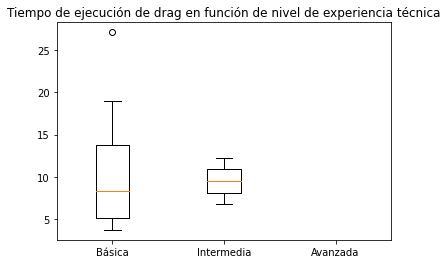

In [198]:
# Tiempo de ejecución de drag en función de nivel de experiencia técnica
plt.boxplot(
    [
        mean_operators['tap'][mean_operators['tap']['Experiencia con tecnología'].isin(['Basica', 'Básica', 'BASICA', 'sin experiencia', 'Elderly'])]['Window(sec/ms)'],
        mean_operators['tap'][mean_operators['tap']['Experiencia con tecnología'].isin(['Intermedia', 'Media'])]['Window(sec/ms)'],
        mean_operators['tap'][mean_operators['tap']['Experiencia con tecnología'].isin(['Avanzada'])]['Window(sec/ms)'],
    ]
)
plt.title('Tiempo de ejecución de drag en función de nivel de experiencia técnica')
plt.xticks([1, 2, 3], ['Básica', 'Intermedia', 'Avanzada'])
plt.show()

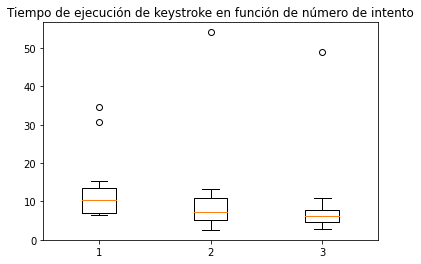

In [201]:
# Tiempo de ejecución de keystroke en función de número de intento
plt.boxplot(
    [
        operators['keystroke'][operators['keystroke']['attempt_number'] == 1 ]['Window(sec/ms)'],
        operators['keystroke'][operators['keystroke']['attempt_number'] == 2 ]['Window(sec/ms)'],
        operators['keystroke'][operators['keystroke']['attempt_number'] == 3]['Window(sec/ms)'],
    ]
)
plt.title('Tiempo de ejecución de keystroke en función de número de intento')
plt.show()

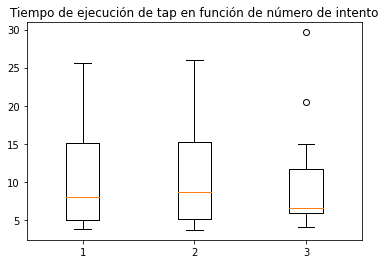

In [202]:
# Tiempo de ejecución de tap en función de número de intento
plt.boxplot(
    [
        operators['tap'][operators['tap']['attempt_number'] == 1]['Window(sec/ms)'],
        operators['tap'][operators['tap']['attempt_number'] == 2]['Window(sec/ms)'],
        operators['tap'][operators['tap']['attempt_number'] == 3]['Window(sec/ms)'],
    ]
)
plt.title('Tiempo de ejecución de tap en función de número de intento')
plt.show()

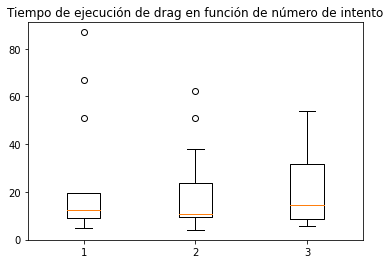

In [204]:
# Tiempo de ejecución de drag en función de número de intento
plt.boxplot(
    [
        operators['drag'][operators['drag']['attempt_number'] == 1]['Window(sec/ms)'],
        operators['drag'][operators['drag']['attempt_number'] == 2]['Window(sec/ms)'],
        operators['drag'][operators['drag']['attempt_number'] == 3]['Window(sec/ms)'],
    ]
)
plt.title('Tiempo de ejecución de drag en función de número de intento')
plt.show()

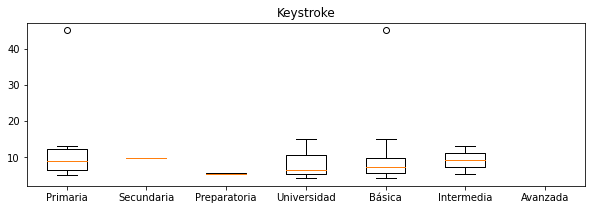

In [213]:
# Agregado keystroke
plt.figure(figsize=(10, 3))
plt.boxplot(
    [
        mean_operators['keystroke'][mean_operators['keystroke']['Nivel de escoralidad'].isin(['Primaria'])]['Window(sec/ms)'],
        mean_operators['keystroke'][mean_operators['keystroke']['Nivel de escoralidad'].isin(['Secundaria'])]['Window(sec/ms)'],
        mean_operators['keystroke'][mean_operators['keystroke']['Nivel de escoralidad'].isin(['Preparatoria'])]['Window(sec/ms)'],
        mean_operators['keystroke'][mean_operators['keystroke']['Nivel de escoralidad'].isin(['UNIVERSIDAD', 'Licenciatura', 'Educacion Superior'])]['Window(sec/ms)'],
        mean_operators['keystroke'][mean_operators['keystroke']['Experiencia con tecnología'].isin(['Basica', 'Básica', 'BASICA', 'sin experiencia', 'Elderly'])]['Window(sec/ms)'],
        mean_operators['keystroke'][mean_operators['keystroke']['Experiencia con tecnología'].isin(['Intermedia', 'Media'])]['Window(sec/ms)'],
        mean_operators['keystroke'][mean_operators['keystroke']['Experiencia con tecnología'].isin(['Avanzada'])]['Window(sec/ms)'],
    ]
)
plt.title('Keystroke')
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['Primaria', 'Secundaria', 'Preparatoria', 'Universidad', 'Básica', 'Intermedia', 'Avanzada'])
plt.show()